<a href="https://colab.research.google.com/github/WesleySephai/Artificial-Neural-Network-ANN-/blob/main/Thuto_Sephai_ANN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 24 March 2025
### Thuto Wesley Sephai
### Deep Learning
### Assignment ANN

 Implement of an Artificial Neural Network (ANN) using TensorFlow and Keras for
image classification on the Diabetes dataset. The assignment should include
following steps:

1. Loading and preprocessing the Diabetes dataset.
2. Defining the architecture of the ANN model, consisting of hidden layers and an
output layer
3. Compiling the model with an appropriate loss function, optimizer, and evaluation
metric
4. Training the model on the training data.
5. Evaluating the model's performance on the test data.   

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Upoading Diabetes dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Diabetes.csv')
print(df.head())

Saving Diabetes.csv to Diabetes (1).csv
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Preprocess the Dataset finding the feature and target values

In [4]:
# Replacing the values that can't be zero
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_replace:
    df[col] = df[col].replace(0, df[col].median())

# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Defining the ANN Architecture

In [5]:
# import its libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(12, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compiling the model with an appropriate loss function, optimizer, and evaluation
metric

In [6]:
model.compile(
    loss='binary_crossentropy',     # Good for binary classification
    optimizer='adam',
    metrics=['accuracy']
)

 Training the model on the training data.

In [7]:
# Train the Model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5881 - loss: 0.8042 - val_accuracy: 0.6098 - val_loss: 0.8109
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6248 - loss: 0.7597 - val_accuracy: 0.6098 - val_loss: 0.7510
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6481 - loss: 0.6875 - val_accuracy: 0.6098 - val_loss: 0.7073
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6358 - loss: 0.7097 - val_accuracy: 0.5935 - val_loss: 0.6737
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6639 - loss: 0.6402 - val_accuracy: 0.5935 - val_loss: 0.6469
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6321 - loss: 0.6287 - val_accuracy: 0.6098 - val_loss: 0.6259
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6838 - loss: 0.5858 - val_accuracy: 0.6098 - val_loss: 0.6079
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6677 - loss: 0.5799 - val_accuracy: 0.66

Evaluating the model's performance on the test data

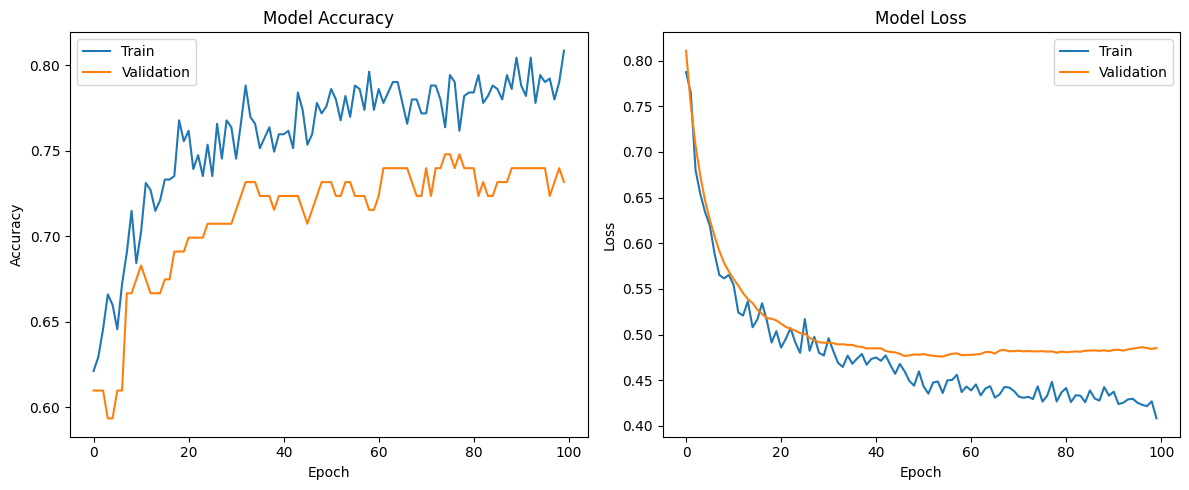

In [8]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()